In [115]:
# Load necessary libraries
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting
from sklearn.model_selection import train_test_split  # For splitting the data
from sklearn.linear_model import LogisticRegression  # For Logistic Regression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc  # For evaluation metrics
import statsmodels.api as sm  # For model summary

In [116]:
# 1. Reading the Data
data = pd.read_csv("/content/Churn_ (1).csv")

In [117]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [118]:
# printing first few rows of the data
print(data.head())

   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [119]:
# Check the structure of the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#2. Exploratory Data Analysis (EDA)

In [120]:

# 2.1 Summary Statistics
print(data.describe())

         RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000     

In [121]:
# Display the dimensions of the dataset
print("Dataset Shape: ", data.shape)

Dataset Shape:  (10000, 14)


In [122]:
# Check for missing values
print("Missing values in the dataset:")
print(data.isnull().sum())

Missing values in the dataset:
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [123]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = data[data.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate Rows in the DataFrame:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the DataFrame.")

No duplicate rows found in the DataFrame.


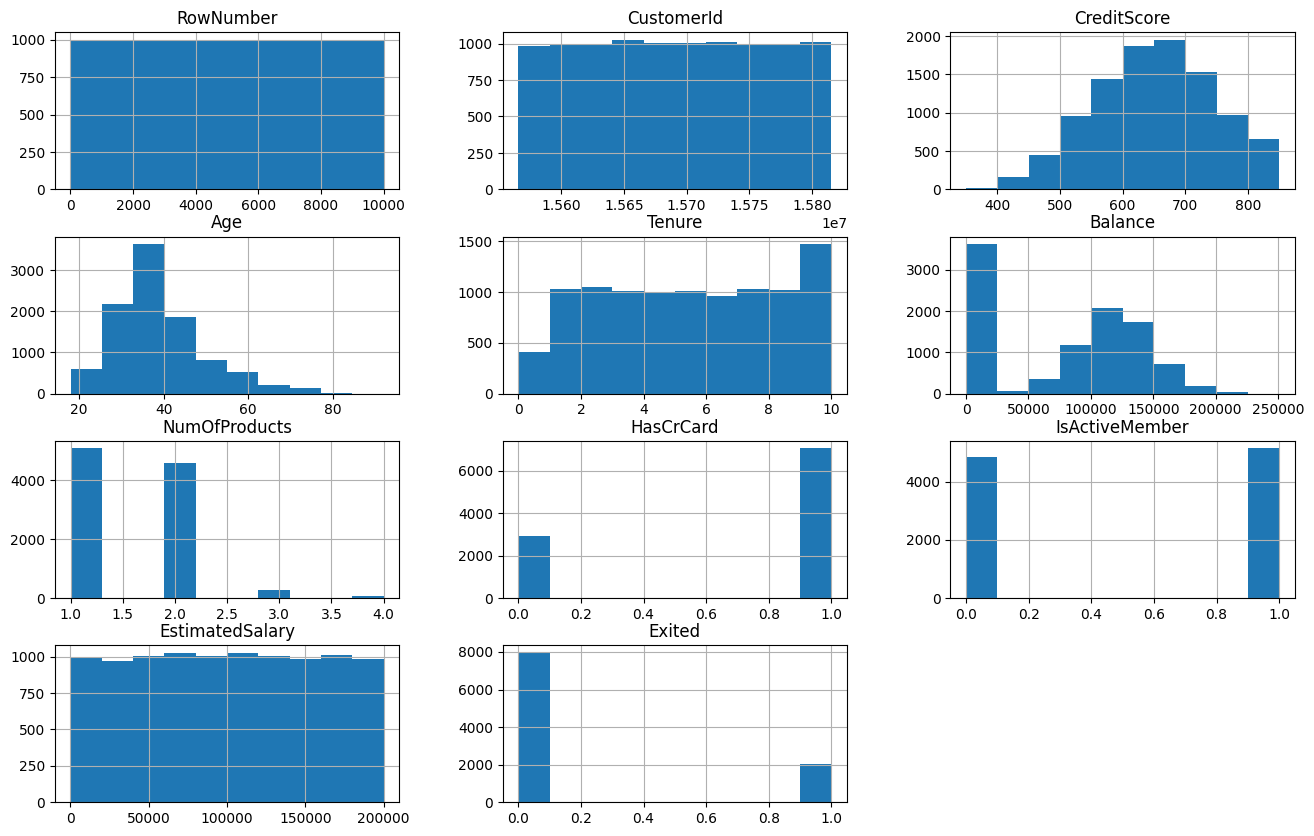

In [124]:
# Visualizations
# Histograms for numerical variables
data.hist(figsize=(16, 10))
plt.show()

Credit Score: Lower scores correlate with a higher likelihood of churn.​

•Geography: Urban customers with high competition are more prone to churn.​

•Gender: Male customers are more likely to switch banks.​

•Age and Tenure: Younger and newer customers have a higher churn rate.​

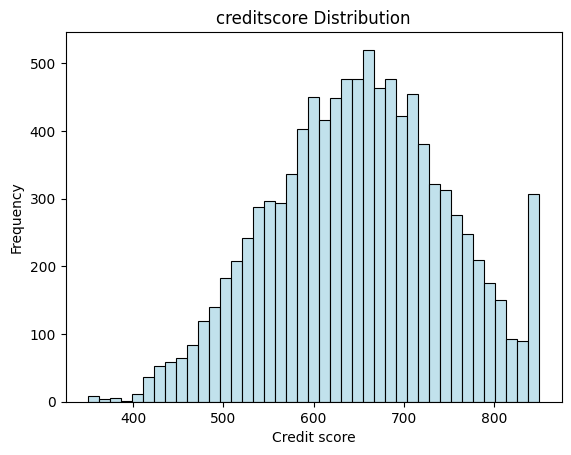

In [141]:
# Balance Distribution
sns.histplot(data['CreditScore'], color='lightblue', kde=False, edgecolor='black')
plt.title('creditscore Distribution')
plt.xlabel('Credit score')
plt.ylabel('Frequency')
plt.show()


<ipython-input-70-fbc9b7968b6c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette='Blues')


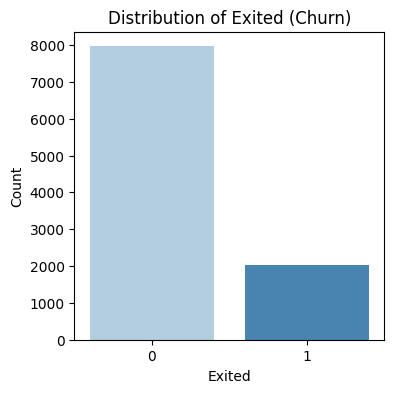

In [70]:
# 2.2 Checking the Distribution of the Target Variable (Exited)
plt.figure(figsize=(4, 4))
sns.countplot(x='Exited', data=data, palette='Blues')
plt.title('Distribution of Exited (Churn)')
plt.xlabel('Exited')
plt.ylabel('Count')
plt.show()

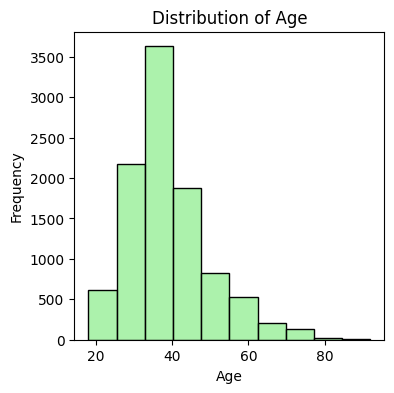

In [22]:
# 2.3 Visualizing Numerical Variables
# Histogram for Age
plt.figure(figsize=(4, 4))
sns.histplot(data['Age'], bins=10, color='lightgreen', kde=False, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

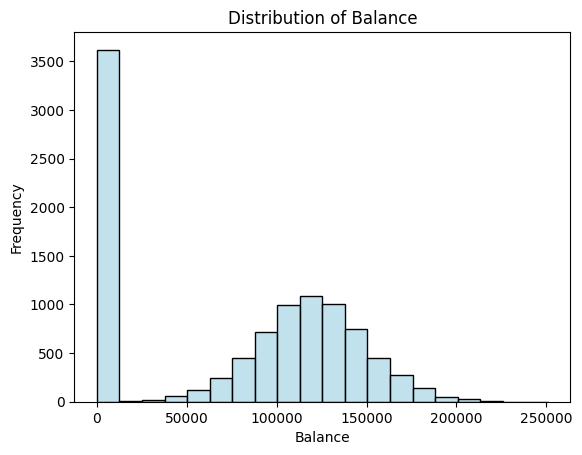

In [23]:
# Balance Distribution
sns.histplot(data['Balance'], bins=20, color='lightblue', kde=False, edgecolor='black')
plt.title('Distribution of Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()


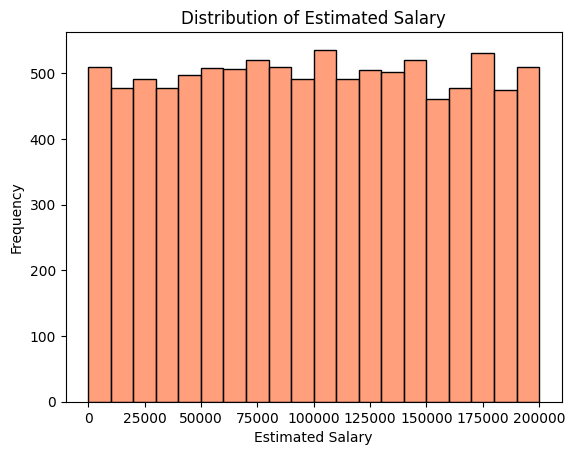

In [24]:
# Estimated Salary Distribution
sns.histplot(data['EstimatedSalary'], bins=20, color='coral', kde=False, edgecolor='black')
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

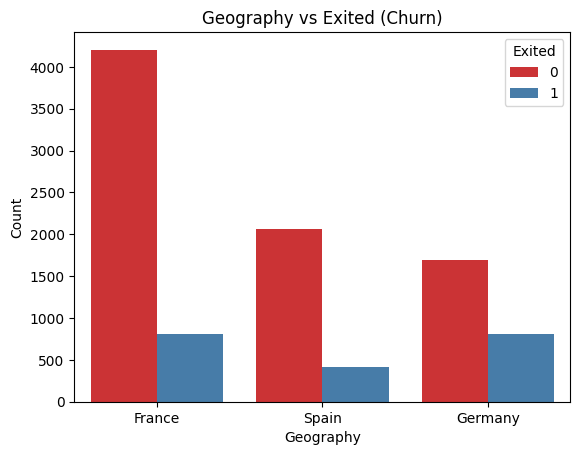

In [125]:
# 2.4 Categorical Variables
# Geography vs Exited
sns.countplot(x='Geography', hue='Exited', data=data, palette='Set1')
plt.title('Geography vs Exited (Churn)')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

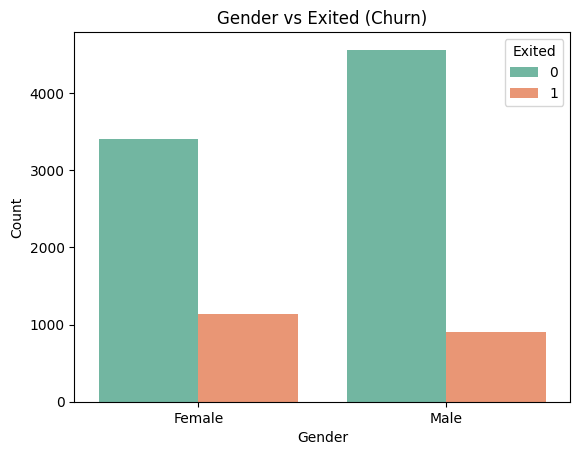

In [126]:
# Gender vs Exited
sns.countplot(x='Gender', hue='Exited', data=data, palette='Set2')
plt.title('Gender vs Exited (Churn)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


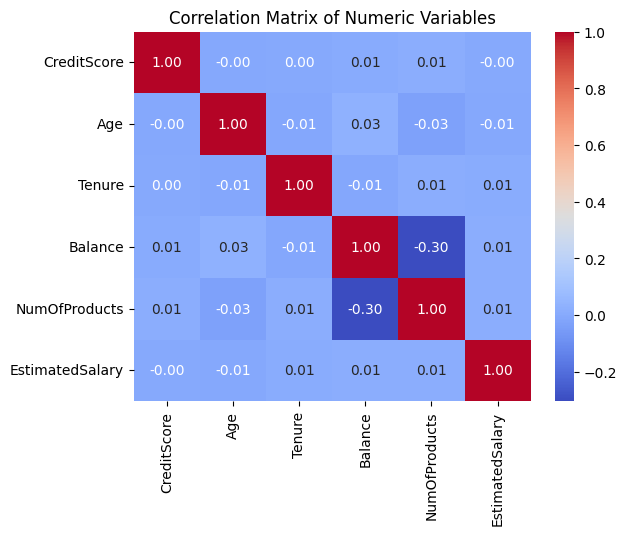

In [127]:
# 2.5 Correlation Analysis
# Correlation matrix for numeric variables
numeric_vars = data[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']]
cor_matrix = numeric_vars.corr()
# Plotting correlation matrix
sns.heatmap(cor_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

EDA shows that variables like credit score, balance, and age are key churn indicators.​

•Geographic and demographic variables reveal location-based patterns in churn.​

•Correlation analysis highlights complex dependencies between variables.

# 3. Data Preprocessing


In [128]:

# Convert categorical variables to numeric using one-hot encoding or label encoding
data['Geography'] = data['Geography'].astype('category').cat.codes
data['Gender'] = data['Gender'].astype('category').cat.codes
data['HasCrCard'] = data['HasCrCard'].astype('category').cat.codes
data['IsActiveMember'] = data['IsActiveMember'].astype('category').cat.codes
data['Exited'] = data['Exited'].astype('category').cat.codes  # Convert target variable to numeric

In [129]:
# Check for any missing values
print(data.isna().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


# 4. Splitting the Data into Training and Testing Sets


In [130]:
X = data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = data['Exited']

In [131]:
# 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# 5. Building the Logistic Regression Model

In [132]:
log_reg = sm.Logit(y_train, sm.add_constant(X_train))  # Adding constant for intercept
model = log_reg.fit()


Optimization terminated successfully.
         Current function value: 0.439599
         Iterations 6


In [133]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Assuming X_train and y_train contain the training features and labels
# Assuming X_test contains the test features

# Create a Logistic Regression model
logit_model = sm.Logit(y_train, X_train)

# Fit the model
logit_results = logit_model.fit()

# Make predictions
y_pred = logit_results.predict(X_test)

# Convert predicted probabilities to binary predictions (0 or 1)
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}")

Optimization terminated successfully.
         Current function value: 0.449869
         Iterations 6
Accuracy: 0.81, Precision: 0.59, Recall: 0.17


In [134]:
# Summary of the model to check the coefficients
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6989
Method:                           MLE   Df Model:                           10
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                  0.1324
Time:                        01:19:13   Log-Likelihood:                -3077.2
converged:                       True   LL-Null:                       -3546.7
Covariance Type:            nonrobust   LLR p-value:                2.479e-195
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -3.3361      0.283    -11.769      0.000      -3.892      -2.781
CreditScore        -0.0009      0.000     -2.815      0.005      -0.002      -0.000
Geography           0.0891      

# 6. Making Predictions

In [136]:

predictions_prob = model.predict(sm.add_constant(X_test))  # Get predicted probabilities
predictions = np.where(predictions_prob > 0.5, 1, 0)  # Convert probabilities to binary output (0 or 1)

# 7. Evaluating the Model

In [137]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[2332   63]
 [ 507   98]]


# 8. Model Accuracy

In [138]:
accuracy = accuracy_score(y_test, predictions)
print(f'Model Accuracy: {accuracy:.4f}')


Model Accuracy: 0.8100


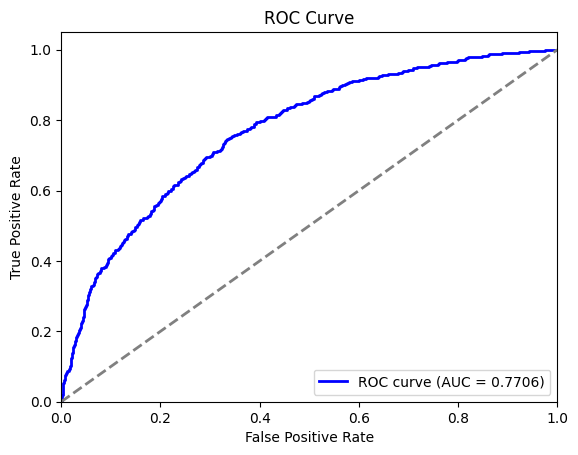

AUC Value: 0.7706


In [139]:
# 9. ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, predictions_prob)
roc_auc = auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

print(f'AUC Value: {roc_auc:.4f}')

Achieved an accuracy of 81%, showing a fair fit for binary prediction.​

Coefficients:​

Age: 0.0696, indicating older customers are more likely to churn.​

Balance: 5.243e-06, suggesting higher balances are associated with increased churn.​

IsActiveMember: -1.0124, showing that active members are less likely to churn.​

CreditScore: -0.0009, slightly reducing churn likelihood with higher scores.​

Gender and credit card ownership have minimal impact on churn in this model.​

AUC score of 0.77 suggests moderate discriminatory power.

In [101]:
#Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 10. Building the Random Forest Model
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=123)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# 11. Making Predictions with the Random Forest Model
rf_predictions = rf_model.predict(X_test)
rf_predictions_prob = rf_model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# 12. Evaluating the Random Forest Model
# Confusion Matrix for Random Forest
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)
print('Random Forest Confusion Matrix:\n', rf_conf_matrix)

# Accuracy of the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Model Accuracy: {rf_accuracy:.4f}')


Random Forest Confusion Matrix:
 [[2316   79]
 [ 323  282]]
Random Forest Model Accuracy: 0.8660


•Achieved higher accuracy at 86.6%, outperforming Logistic Regression.​

•Reduced false negatives, identifying at-risk customers more effectively.​

•Handles complex, non-linear patterns in customer churn data.​

•Provides insights into important predictors for churn.

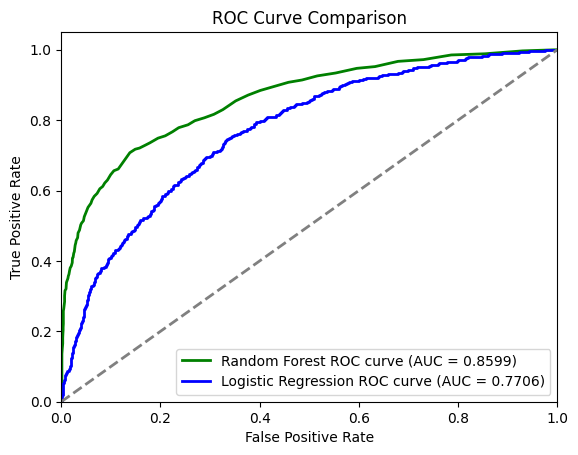

In [103]:
# ROC Curve and AUC for Random Forest
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_predictions_prob)
rf_auc = auc(rf_fpr, rf_tpr)

# Plotting the ROC Curve for Random Forest
plt.figure()
plt.plot(rf_fpr, rf_tpr, color='green', lw=2, label=f'Random Forest ROC curve (AUC = {rf_auc:.4f})')
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()




In [104]:
# Comparison of Accuracy Measures
print(f'Logistic Regression Model Accuracy: {accuracy:.4f}')
print(f'Random Forest Model Accuracy: {rf_accuracy:.4f}')

Logistic Regression Model Accuracy: 0.8090
Random Forest Model Accuracy: 0.8660
